In [1]:
import tensorflow as tf
import numpy as np

## Recap usage

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0, 100, (5,5))
rand_b = np.random.uniform(0, 100, (5,1))

print(rand_a)
print(rand_b)

[[ 51.63986277  57.06675869   2.84742265  17.15216562  68.52769817]
 [ 83.38968626  30.69662197  89.36130797  72.15438618  18.99389542]
 [ 55.42275911  35.2131954   18.18924027  78.56017619  96.54832224]
 [ 23.23536618   8.35614337  60.35484223  72.89927573  27.62388285]
 [ 68.53063288  51.78674742   4.84845374  13.78692376  18.69674261]]
[[ 99.43179012]
 [ 52.06653967]
 [ 57.87895355]
 [ 73.48190583]
 [ 54.19617722]]


In [4]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [5]:
add_op = a + b
mul_op = a * b

In [6]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    
    print(add_result, end='\n\n')
    print(mul_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]

[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


## Example Neural Network

In [7]:
n_features = 10
n_dense_neurons = 3

In [8]:
x = tf.placeholder(tf.float32, shape=(None, n_features))

In [9]:
# Weight
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

# bios
b = tf.Variable(tf.ones([n_dense_neurons]))

In [10]:
# operations 
xW = tf.matmul(x, W)
z = tf.add(xW, b)

In [11]:
# activation function
a = tf.sigmoid(z)

In [12]:
init = tf.global_variables_initializer()

In [13]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [14]:
print(layer_out)

[[ 0.19592889  0.84230143  0.36188066]]


## Simple Regression Example

In [15]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [16]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [17]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [18]:
y_label

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

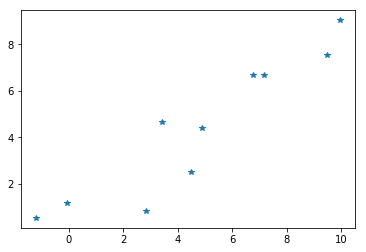

In [20]:
plt.plot(x_data, y_label, '*')

In [21]:
# y = mx + b

m = tf.Variable(0.3)
b = tf.Variable(0.9)

In [22]:
error = 0
for x, y in zip(x_data, y_label):
    y_hat = m * x + b
    
    error += (y - y_hat) ** 2

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [25]:
init = tf.global_variables_initializer()

In [29]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m, b])

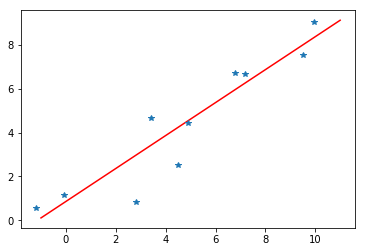

In [30]:
x_test = np.linspace(-1, 11, 10)

# y = mx + b
y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')